<a href="https://colab.research.google.com/github/jonahsjlee/Git-Hub-Intro/blob/main/CSVandPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#reading the csv file
import pandas as pd

df = pd.read_csv('sample_data/acc_players-2324F.csv')

df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Totals,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Shooting,Unnamed: 15,Unnamed: 16,Unnamed: 17,Advanced,Unnamed: 19,Unnamed: 20
0,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
1,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.2,0.615,4.1,-0.1,-6.4
2,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.5,0.5,NaN,NaN,3.5,0,-6.7
3,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
4,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0,1,NaN,1.1,0,-8.2


In [25]:
#Total points scored by all players
df['Unnamed: 13'].iloc[1:].astype('int').sum()

38411

In [26]:
#Player who has played the most minutes
df['Unnamed: 6'].iloc[1:].max()

'989'

In [33]:
#Top 5 players in terms of total rebounds
df['Unnamed: 7'].iloc[1:].astype('int').nlargest(5)

,Unnamed: 7
6,380
179,340
91,327
45,311
150,309


In [49]:
#New dataframe with only players who played more than 500 minutes
df['Unnamed: 6'] = pd.to_numeric(df['Unnamed: 6'], errors='coerce')

filtered_df = df[df['Unnamed: 6'] > 500]
filtered_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Totals,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Shooting,Unnamed: 15,Unnamed: 16,Unnamed: 17,Advanced,Unnamed: 19,Unnamed: 20
3,3,Prince Aligbe,SO,F,Boston College,35,651.0,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
5,5,Zack Austin,JR,F,Pittsburgh,33,746.0,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18,2.9,7.9
6,6,Armando Bacot,SR,F,North Carolina,37,1123.0,380,56,22,...,60,100,538,0.54,0.544,0.4,0.781,24.6,6.1,8.9
8,8,Reece Beekman,SR,G,Virginia,34,1114.0,124,212,68,...,70,43,486,0.443,0.487,0.31,0.754,23.4,4.9,10.5
10,10,Chris Bell,SO,F,Syracuse,32,865.0,75,21,18,...,26,58,384,0.434,0.459,0.42,0.842,14.9,2.2,3.3


In [50]:
#Player with highest total assists
filtered_df['Unnamed: 8'].max()

'92'

In [53]:
#Top 3 Assist Leads
filtered_df_sorted = filtered_df.sort_values('Unnamed: 8', ascending=False)
top_5_players = filtered_df_sorted['Unnamed: 1'].head(5)
print(top_5_players.to_frame())


          Unnamed: 1
202     Jalen Warley
204    Jamir Watkins
190  Kyle Sturdivant
170     Andrew Rohde
39   Quadir Copeland


In [54]:
#Top 3 Shot Blockers
filtered_df_blockers = filtered_df.sort_values('Unnamed: 10', ascending=False)
top_5_players = filtered_df_blockers['Unnamed: 1'].head(5)
print(top_5_players.to_frame())

             Unnamed: 1
157        Wooga Poplar
116        Mason Madsen
96      Ty-Laur Johnson
142        Tyler Nickel
27   Carlton Carrington


In [62]:
#Group players by school and calculate the total points scored by each school

#Convert PTS to int before finding the sum
df['Unnamed: 13'] = pd.to_numeric(df['Unnamed: 13'], errors='coerce')

school_points = df.groupby('Unnamed: 4')['Unnamed: 13'].sum()
print(school_points.to_frame())

                Unnamed: 13
Unnamed: 4                 
Boston College       2667.0
Clemson              2785.0
Duke                 2830.0
Florida State        2526.0
Georgia Tech         2272.0
Louisville           2304.0
Miami (FL)           2424.0
NC State             3101.0
North Carolina       3032.0
Notre Dame           2113.0
Pittsburgh           2495.0
School                  0.0
Syracuse             2442.0
Virginia             2140.0
Virginia Tech        2547.0
Wake Forest          2733.0


In [64]:
#Group players by school and calculate the total assists for each team

df['Unnamed: 8'] = pd.to_numeric(df['Unnamed: 8'], errors='coerce')

school_assists = df.groupby('Unnamed: 4')['Unnamed: 8'].sum()
print(school_assists.to_frame())


                Unnamed: 8
Unnamed: 4                
Boston College       509.0
Clemson              533.0
Duke                 551.0
Florida State        406.0
Georgia Tech         425.0
Louisville           356.0
Miami (FL)           454.0
NC State             536.0
North Carolina       536.0
Notre Dame           335.0
Pittsburgh           452.0
School                 0.0
Syracuse             442.0
Virginia             509.0
Virginia Tech        514.0
Wake Forest          429.0


In [67]:
#Top 3 schools based on total points scored
school_points.nlargest(3)

,Unnamed: 13
Unnamed: 4,
NC State,3101.0
North Carolina,3032.0
Duke,2830.0


        Unnamed: 1  Unnamed: 13
43        RJ Davis        784.0
82        DJ Horne        677.0
71         PJ Hall        659.0
176  Hunter Sallis        613.0
81    Blake Hinson        609.0


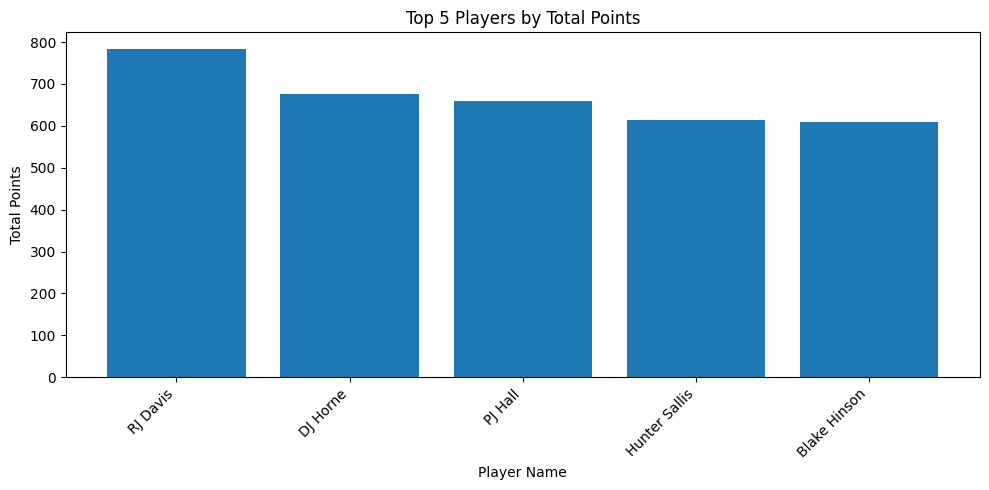

In [81]:
#Bonus 1: Barchart for top 5 players by total points scored

import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Unnamed: 13' to numeric, handling potential errors
df['Unnamed: 13'] = pd.to_numeric(df['Unnamed: 13'], errors='coerce')

df_sorted = df.sort_values('Unnamed: 13', ascending=False)
top_5_players = df_sorted[['Unnamed: 1', 'Unnamed: 13']].head(5) # Select both player name and points columns

print(top_5_players)

# Create a bar chart
plt.figure(figsize=(10, 5))  # Set the figure size
plt.bar(top_5_players['Unnamed: 1'], top_5_players['Unnamed: 13']) #Use the correct column names for the Series
plt.xlabel("Player Name")
plt.ylabel("Total Points")
plt.title("Top 5 Players by Total Points")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Correlation coefficient: 0.4210663894199787


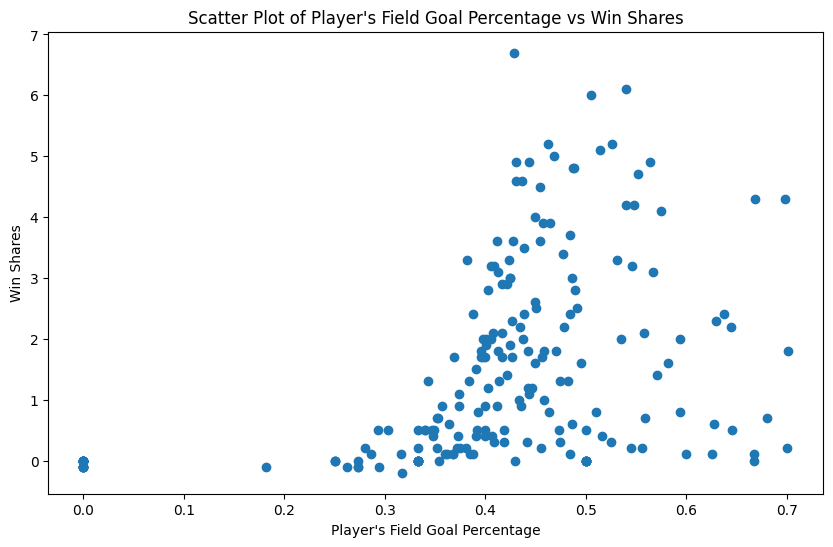

In [82]:
#Bonus 2: Correlation between FG% and WS

import pandas as pd
import matplotlib.pyplot as plt

df = df.rename(columns={'Unnamed: 19': 'Win Shares', 'Shooting': 'Player\'s Field Goal Percentage'})

df['Player\'s Field Goal Percentage'] = pd.to_numeric(df['Player\'s Field Goal Percentage'], errors='coerce')
df['Win Shares'] = pd.to_numeric(df['Win Shares'], errors='coerce')

# Correlation coefficient
correlation = df['Player\'s Field Goal Percentage'].corr(df['Win Shares'])
print(f"Correlation coefficient: {correlation}")

plt.figure(figsize=(10, 6))
plt.scatter(df['Player\'s Field Goal Percentage'], df['Win Shares'])
plt.xlabel("Player's Field Goal Percentage")
plt.ylabel("Win Shares")
plt.title("Scatter Plot of Player's Field Goal Percentage vs Win Shares")
plt.show()